In [22]:
# ysa_mnist.ipynb
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [23]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 253 237 200  57   

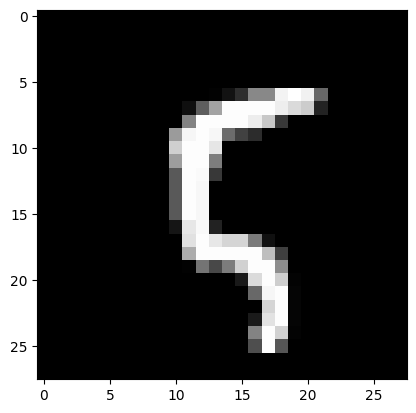

5


In [24]:
import numpy as np
sayi=100
np.set_printoptions(linewidth=300)
print(train_images[sayi])
import matplotlib.pyplot as plt

plt.imshow(train_images[sayi],cmap="gray")
plt.show()
print(train_labels[sayi])



In [25]:
# veriler(resimler) normalize edilecek.
# Etiketlerin tek sütun yapısı tek-satırı-tek(one-hot-encoding) kodlama ile tahmin edilecek sınıf sayısına çıkarılacak

train_images = train_images.astype("float32")/255
test_images=test_images.astype("float32")/255


In [ ]:
print(train_images[sayi])

In [28]:
from keras.utils import to_categorical

print(train_labels[0:5])
print(test_labels[0:5])

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[0:5])
print(test_labels[0:5])

[5 0 4 1 9]
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
